## M04W01 - Exercises

**(Linear Regression)**

Given one dataset of advertising methods, costs associated with each method, and final sales volumn for each data row. Try to explore the data set and use Linear Regression to predict the sales.

*-- Exercise provided by AIO2024, whyfor13 try to solve it on 04/10/2024 --*

**Exercise 1** (read and process data from file csv): Complete the function prepare_data(file_name_dataset) with X is input and y is output.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    result = [data[x][index] for x in range(len(data))]
    return result


def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset , delimiter =',', skip_header =1).tolist()
    N = len(data)

    # get tv (index = 0)
    tv_data = get_column(data, 0)

    # get radio (index = 1)
    radio_data = get_column(data, 1)

    # get newspaper (index = 2)
    newspaper_data = get_column(data, 2)
    
    # get sales (index = 3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X,y

In [82]:
# Multiple choice question 1
X,y = prepare_data (r'data/advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

# My answer is A

[624.1, 175.1, 300.5, 78.9]


**Exercise 2:**  
Training data using one sample - linear regression with loss is calculated by formula Mean Squared Error L = (y^ - y)^2

In [107]:
""" Below is a function to initialize params randomly. To answer multiple choice questions, 
we will use fixed params provided from the exercises.

def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b  = 0
    return w1, w2, w3, b
"""

def initialize_params():
    w1 , w2 , w3 , b = (0.016992259082509283, 0.0070783670518262355 , -0.002307860847821344 , 0)
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1*x1 + w2*x2 + w3*x3 + b
    return result

In [108]:
# Multiple choice question 2:
O = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5 , w3=0, b=0.5)
print(O)

# My answer is A

1.0


In [121]:
def compute_loss(y_hat, y):
    loss = (y_hat - y) ** 2
    return loss


# Multiple choice question 3:
l = compute_loss(y_hat=1, y=0.5)
print(l)

# My answer is A

0.25


In [110]:
# compute gradient
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * xi * (y_hat - y)
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat - y)
    return dl_db


# Multiple question 4: My answer is A
# MSE loss
g_wi = compute_gradient_wi(xi=1.0, y=1.0 , y_hat=0.5)
print('Derivative of Loss with respect to wi is:', g_wi)

# Multiple question 5: My answer is B:
g_b = compute_gradient_b(y=2.0 ,y_hat =0.5)
print('Derivative of Loss with respect to b is:', g_b)

Derivative of Loss with respect to wi is: -1.0
Derivative of Loss with respect to b is: -3.0


In [111]:
# update weights
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - (lr * dl_dwi)
    return wi

def update_weight_b(b, dl_db, lr):
    b = b - (lr * dl_db)
    return b

# Multiple question 6: My answer is A
after_wi = update_weight_wi(wi =1.0 , dl_dwi = -0.5 , lr = 1e-5)
print(after_wi)

# Multiple question 7: My answer is A
after_b = update_weight_b(b=0.5 , dl_db = -1.0 , lr = 1e-5)
print(after_b)

1.000005
0.50001


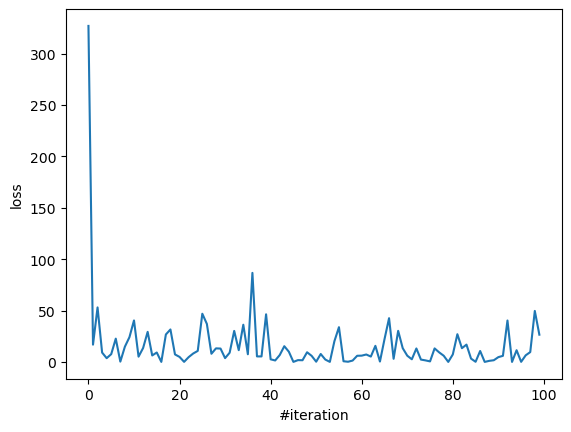

In [118]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss(y_hat, y)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db  = compute_gradient_b(y, y_hat)
            
            #update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b  = update_weight_b(b, dl_db, lr)

            #logging
            losses.append(loss)
    return (w1, w2, w3, b, losses)


(w1 ,w2 ,w3 ,b, losses) = implement_linear_regression (X,y)
plt.plot(losses[:100])
plt.ylabel("loss")
plt.xlabel('#iteration')
plt.show()

In [119]:
# Multiple choice question 8: My answer is A
X,y = prepare_data(r'data/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X,y)
print(w1 , w2 , w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [120]:
# Multiple choice question 9: My answer is B
tv = 19.2
radio = 35.9
newspaper = 51.3
X,y = prepare_data(r'data/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max =50 , lr =1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


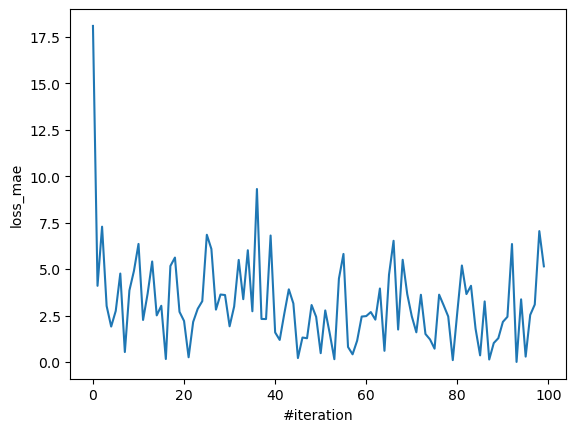

In [122]:
# MAE replace loss function above with MAE loss:
def compute_loss_mae(y_hat, y):
    loss = abs(y_hat - y)
    return loss

def implement_linear_regression_mae(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses_mae = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mae(y_hat, y)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db  = compute_gradient_b(y, y_hat)
            
            #update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b  = update_weight_b(b, dl_db, lr)

            #logging
            losses_mae.append(loss)
    return (w1, w2, w3, b, losses_mae)


(w1 ,w2 ,w3 ,b, losses_mae) = implement_linear_regression_mae(X,y)
plt.plot(losses_mae[:100])
plt.ylabel("loss_mae")
plt.xlabel('#iteration')
plt.show()

In [123]:
# Multiple choice question 10: My answer is A
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5
